# Análise de Dados - UFPB

**Professor** : Marcus Carvalho

Aluno: FILIPE DE LIMA VAZ MONTEIRO

# Laboratório: Regressão

Você deve usar os dados das eleições do TSE para entender os fatores que influenciam a votação dos candidatos usando modelos de regressão e outras análises estatísticas. Nesta atividade, vocês devem concentrar a análise em candidatos a deputado estadual na Paraíba em 2022. Os dados que combinam informações de votação, receitas de campanha e bens dos candidatos estão no arquivo `dados/eleicao_2022_pb_deputado_estadual.csv`. A análise deve ser feita neste relatório Jupyter Notebook. O relatório já possui algumas perguntas a serem respondidas. Use as perguntas como base, mas não fique preso a elas. Você pode fazer novas perguntas e novas análises à vontade.

## Carregamento dos dados

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

eleicoes = (
    pd.read_csv('dados/eleicao_2022_pb_deputado_estadual.csv')
)
eleicoes

,SQ_CANDIDATO,ANO_ELEICAO,SG_UF,DS_CARGO,NR_CANDIDATO,NM_URNA_CANDIDATO,SG_PARTIDO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,DS_SIT_TOT_TURNO,QT_VOTOS,VR_RECEITA,VR_BEM_CANDIDATO
0,150001643207,2022,PB,DEPUTADO ESTADUAL,13999,NAL DA BANCA,PT,30/11/1983,39,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),BRANCA,COMERCIANTE,1270629.01,SUPLENTE,331.0,6000.00,NaN
1,150001718492,2022,PB,DEPUTADO ESTADUAL,36013,NILDÃO É POVÃO,AGIR,22/04/1961,61,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA,ADMINISTRADOR,1270629.01,NÃO ELEITO,123.0,1347.25,200000.00
2,150001718098,2022,PB,DEPUTADO ESTADUAL,15789,ANDRE GADELHA,MDB,10/04/1975,47,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA,ADMINISTRADOR,1270629.01,SUPLENTE,18374.0,168500.00,1387610.47
3,150001718219,2022,PB,DEPUTADO ESTADUAL,22122,CICINHO LIMA,PL,04/09/1974,48,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PRETA,CANTOR E COMPOSITOR,1270629.01,SUPLENTE,15703.0,226765.60,NaN
4,150001621356,2022,PB,DEPUTADO ESTADUAL,45745,ROSA TORREÃO,PSDB,26/07/1980,42,FEMININO,ENSINO FUNDAMENTAL INCOMPLETO,CASADO(A),PARDA,CABELEIREIRO E BARBEIRO,1270629.01,SUPLENTE,163.0,31500.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,150001718225,2022,PB,DEPUTADO ESTADUAL,22300,WELLINGTON CARNEIRO,PL,02/07/1969,53,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),PARDA,OUTROS,1270629.01,SUPLENTE,182.0,15000.00,NaN
457,150001603148,2022,PB,DEPUTADO ESTADUAL,44112,PASTOR PAULINHO PAZ,UNIÃO,28/03/1985,37,MASCULINO,SUPERIOR INCOMPLETO,CASADO(A),BRANCA,OUTROS,1270629.01,NÃO ELEITO,90.0,NaN,NaN
458,150001718212,2022,PB,DEPUTADO ESTADUAL,22001,PROF SGT JOELSON,PL,15/03/1963,59,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA,OUTROS,1270629.01,SUPLENTE,2228.0,15011.65,22000.00
459,150001725483,2022,PB,DEPUTADO ESTADUAL,12321,CONCEIÇÃO OLIVEIRA,PDT,08/12/1995,27,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,"ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS",1270629.01,#NULO#,NaN,NaN,NaN


## Análise exploratória de dados

Inicialmente, faça uma análise exploratória das variáveis que você considerar mais importantes para a análise.

Dada a tabela de eleicoes. Os 7º dados que julgo mais importantes são:

Estado (SG_UF): Pois permite analisar a distribuição geográfica dos candidatos e dos resultados eleitorais, sendo para entender as características regionais e as dinâmicas políticas locais.

Partido Político (SG_PARTIDO): Pois ajuda a compreender a filiação partidária dos candidatos e a influência dos partidos políticos nas eleições. Além disso, serve para analisar a distribuição de poder entre os diversos partidos.

Quantidade de Votos (QT_VOTOS): Pois permite avaliar o desempenho eleitoral de cada candidato, sendo um indicador direto da aceitação e apoio recebidos dos eleitores.

Situação do Turno (DS_SIT_TOT_TURNO): Pois indica o resultado do candidato em relação ao turno da eleição, seja eleito, não eleito, eleito por média, etc. Com o objetivo de entender o resultado final da eleição e suas implicações.

Data de Nascimento (DT_NASCIMENTO) e Idade na Data da Posse (NR_IDADE_DATA_POSSE): Pois permitem analisar a distribuição etária dos candidatos e sua relação com o desempenho eleitoral. A idade dos candidatos pode ter impacto na percepção dos eleitores e nas estratégias de campanha.

Gênero (DS_GENERO): Pois é importante para entender a representatividade de homens e mulheres entre os candidatos e sua correlação com os resultados eleitorais.

Cor/Raça (DS_COR_RACA): Pois é essencial para analisar a representatividade racial e étnica entre os candidatos e sua relação com os resultados eleitorais. A inclusão deste dado permite avaliar a diversidade e a equidade racial na política, bem como identificar possíveis disparidades ou padrões relacionados à preferência dos eleitores.

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

eleicoes = pd.read_csv('dados/eleicao_2022_pb_deputado_estadual.csv')

eleicoes_selecionadas = eleicoes.loc[:, ['SG_UF', 'SG_PARTIDO', 'DT_NASCIMENTO', 'NR_IDADE_DATA_POSSE', 
                                         'DS_GENERO', 'DS_COR_RACA', 'DS_SIT_TOT_TURNO']]

display(eleicoes_selecionadas)


,SG_UF,SG_PARTIDO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_COR_RACA,DS_SIT_TOT_TURNO
0,PB,PT,30/11/1983,39,MASCULINO,BRANCA,SUPLENTE
1,PB,AGIR,22/04/1961,61,MASCULINO,PARDA,NÃO ELEITO
2,PB,MDB,10/04/1975,47,MASCULINO,PARDA,SUPLENTE
3,PB,PL,04/09/1974,48,MASCULINO,PRETA,SUPLENTE
4,PB,PSDB,26/07/1980,42,FEMININO,PARDA,SUPLENTE
...,...,...,...,...,...,...,...
456,PB,PL,02/07/1969,53,MASCULINO,PARDA,SUPLENTE
457,PB,UNIÃO,28/03/1985,37,MASCULINO,BRANCA,NÃO ELEITO
458,PB,PL,15/03/1963,59,MASCULINO,PARDA,SUPLENTE
459,PB,PDT,08/12/1995,27,FEMININO,PARDA,#NULO#


## Análise das relações entre variáveis

Faça uma análise das relações entre as variáveis em questão. Você pode começar
com uma análise gráfica das relações entre variáveis, para depois partir para
análise de correlação. Explique se existem variáveis com forte impacto no número de votos e na chance do candidato ser eleito.

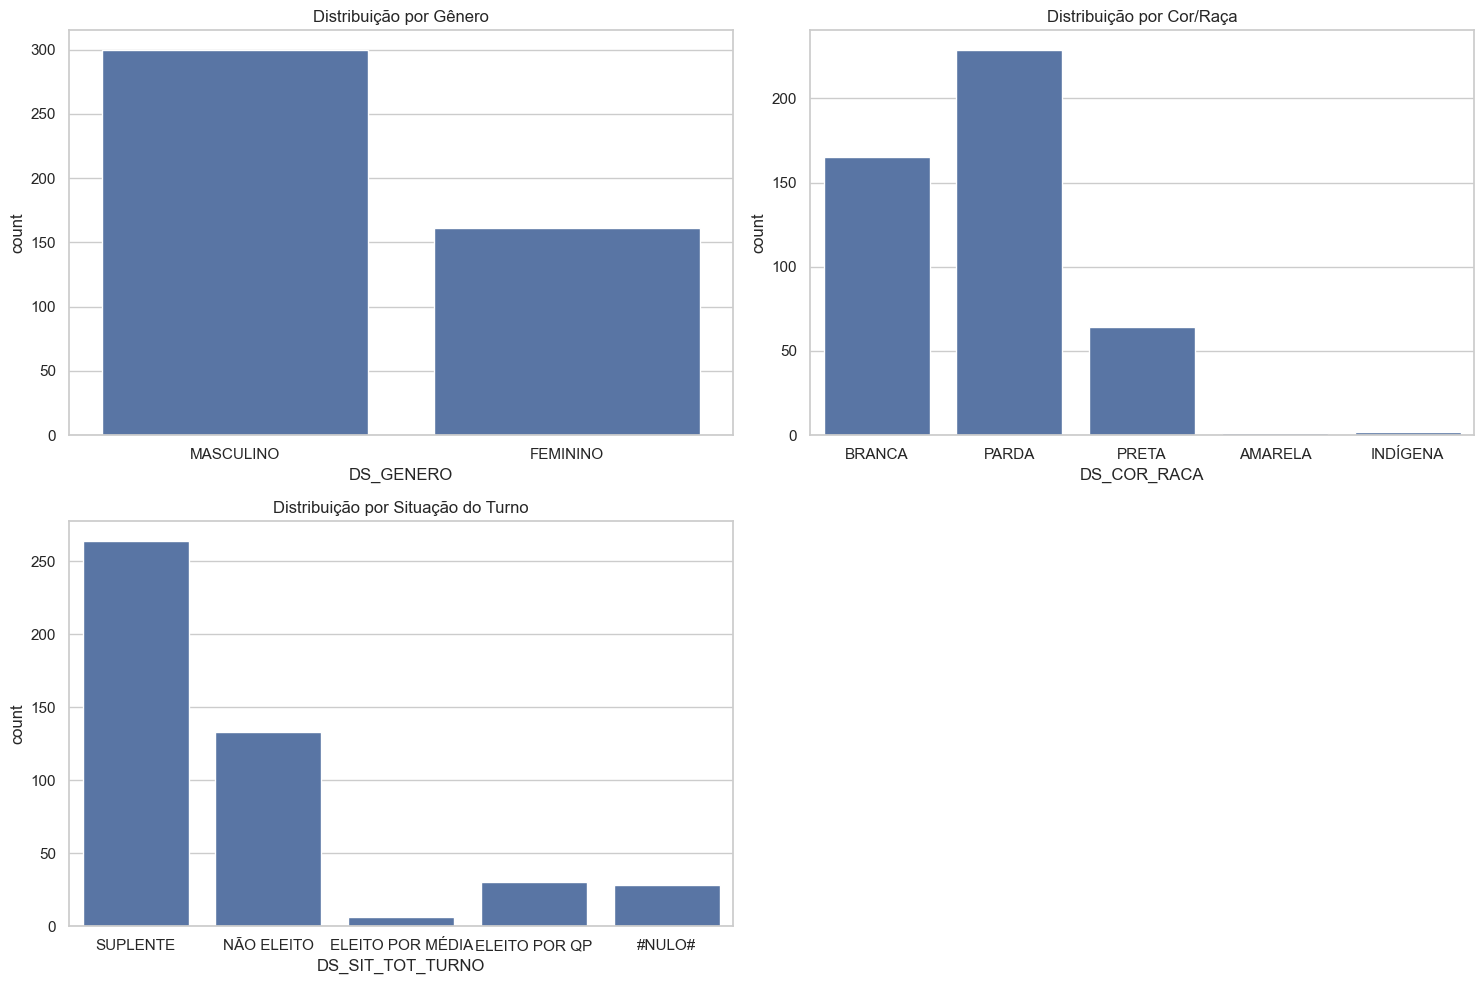

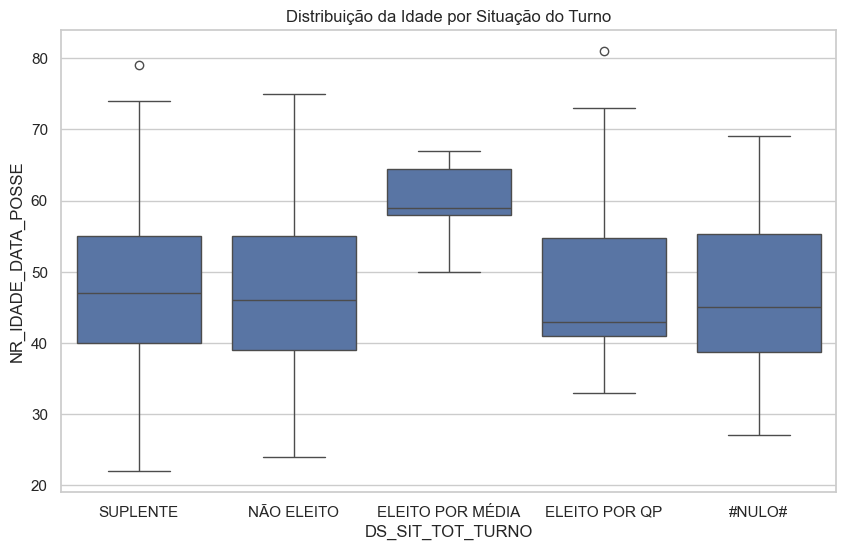

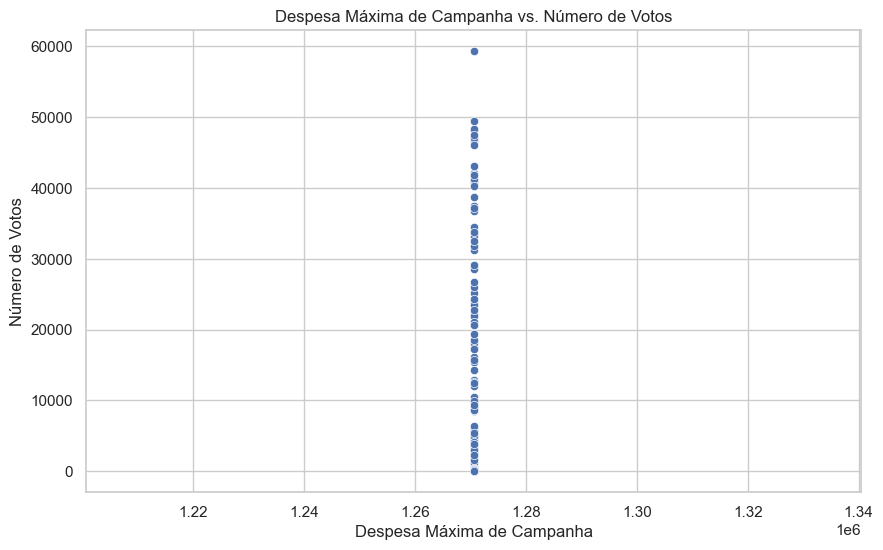

In [57]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.countplot(x='DS_GENERO', data=eleicoes_selecionadas)
plt.title('Distribuição por Gênero')

plt.subplot(2, 2, 2)
sns.countplot(x='DS_COR_RACA', data=eleicoes_selecionadas)
plt.title('Distribuição por Cor/Raça')

plt.subplot(2, 2, 3)
sns.countplot(x='DS_SIT_TOT_TURNO', data=eleicoes_selecionadas)
plt.title('Distribuição por Situação do Turno')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='DS_SIT_TOT_TURNO', y='NR_IDADE_DATA_POSSE', data=eleicoes_selecionadas)
plt.title('Distribuição da Idade por Situação do Turno')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='VR_DESPESA_MAX_CAMPANHA', y='QT_VOTOS', data=eleicoes)
plt.title('Despesa Máxima de Campanha vs. Número de Votos')
plt.xlabel('Despesa Máxima de Campanha')
plt.ylabel('Número de Votos')
plt.show()


### Distribuição de Votos de cada Deputado

Text(0.5, 1.0, 'Distribuição de Votos por Deputados')

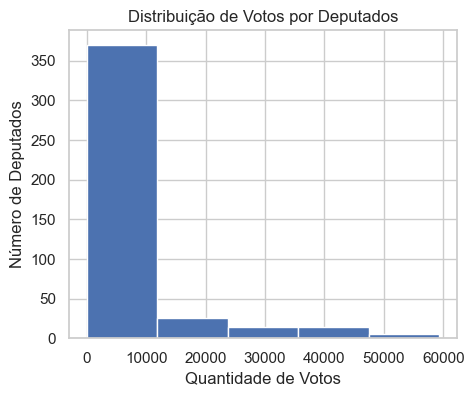

In [58]:
ax = eleicoes['QT_VOTOS'].plot.hist(bins=5, figsize=(5, 4))
plt.xlabel('Quantidade de Votos')
plt.ylabel('Número de Deputados')
plt.title('Distribuição de Votos por Deputados')

A investigação revelou que, em 2022, a maioria dos deputados estaduais na Paraíba recebeu, em média, cerca de 350 votos. Houve uma redução no número de deputados à medida que o número de votos aumentava. Isso indica uma discrepância na popularidade dos deputados, com alguns conseguindo uma quantidade significativa de votos, enquanto a maioria recebeu uma quantidade mais modesta.

Text(0.5, 1.0, 'Distribuição de Votos por Deputados')

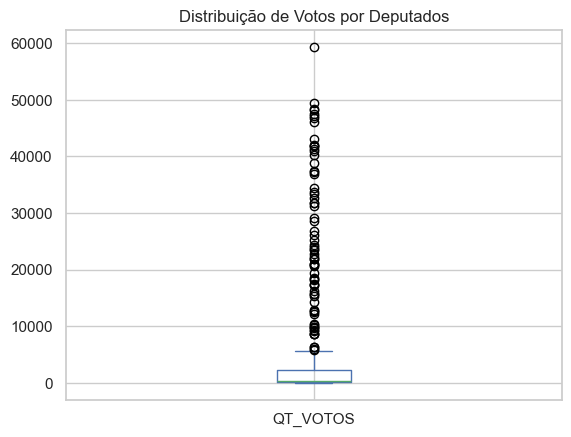

In [59]:
box_plot = eleicoes['QT_VOTOS'].plot.box()
plt.title('Distribuição de Votos por Deputados')

A representação gráfica através de um boxplot mostrou uma caixa relativamente compacta em comparação com a dispersão dos dados, juntamente com um número significativo de valores discrepantes. Essa observação indica uma ampla variabilidade nos dados, com uma parte substancial das observações se distanciando consideravelmente da média.

### Medidas de Centralidade

In [60]:
eleicoes['QT_VOTOS'].agg(["mean", "median"])

mean      4882.755245
median     383.000000
Name: QT_VOTOS, dtype: float64

### Estatísticas de Dispersão

In [61]:
variancia_eleicoes = eleicoes['QT_VOTOS'].var()
desvio_padrao_eleicoes = eleicoes['QT_VOTOS'].std()

media_eleicoes = eleicoes['QT_VOTOS'].mean()
coeficiente_variacao_eleicoes = desvio_padrao_eleicoes / media_eleicoes

q1_eleicoes = eleicoes['QT_VOTOS'].quantile(0.25)
q3_eleicoes = eleicoes['QT_VOTOS'].quantile(0.75)
iqr_eleicoes = q3_eleicoes - q1_eleicoes

print("Variância: ", variancia_eleicoes)
print("Desvio Padrão: ", desvio_padrao_eleicoes)
print("Coeficiente de variação: ", coeficiente_variacao_eleicoes)
print("IQR: ", iqr_eleicoes)


Variância:  116527406.62920724
Desvio Padrão:  10794.786085384334
Coeficiente de variação:  2.210798113827112
IQR:  2181.0


Após examinar os dados de votação dos candidatos a deputado estadual na Paraíba em 2022, foi observada uma distribuição assimétrica dos votos. Enquanto a média de votos foi substancialmente mais alta do que a mediana (4882.76 em comparação com 383), indicando que alguns candidatos receberam uma quantidade significativamente maior de votos do que a maioria. Além disso, a variância considerável (116.527.406,63) e o desvio padrão (10794.79) destacam a dispersão significativa dos votos em relação à média. O coeficiente de variação de 2.21 mostra uma variabilidade moderada relativa à média. O Intervalo Interquartil (IQR) de 2181.0 indica uma dispersão concentrada nos 50% centrais dos votos. Em resumo, os dados refletem uma distribuição desigual dos votos, com uma minoria de candidatos recebendo uma quantidade expressiva de votos em comparação com a maioria.

#### Deputado com mais Votos

In [62]:
eleicoes.sort_values('QT_VOTOS', ascending=False).iloc[0]

SQ_CANDIDATO                    150001619565
ANO_ELEICAO                             2022
SG_UF                                     PB
DS_CARGO                   DEPUTADO ESTADUAL
NR_CANDIDATO                           10444
NM_URNA_CANDIDATO            ADRIANO GALDINO
SG_PARTIDO                      REPUBLICANOS
DT_NASCIMENTO                     21/10/1960
NR_IDADE_DATA_POSSE                       62
DS_GENERO                          MASCULINO
DS_GRAU_INSTRUCAO          SUPERIOR COMPLETO
DS_ESTADO_CIVIL                    CASADO(A)
DS_COR_RACA                           BRANCA
DS_OCUPACAO                         DEPUTADO
VR_DESPESA_MAX_CAMPANHA           1270629.01
DS_SIT_TOT_TURNO               ELEITO POR QP
QT_VOTOS                             59329.0
VR_RECEITA                         278897.91
VR_BEM_CANDIDATO                  1516707.22
Name: 297, dtype: object

#### Deputado com menos Votos

In [63]:
eleicoes.sort_values('QT_VOTOS', ascending=True).iloc[0]

SQ_CANDIDATO                              150001737760
ANO_ELEICAO                                       2022
SG_UF                                               PB
DS_CARGO                             DEPUTADO ESTADUAL
NR_CANDIDATO                                     35444
NM_URNA_CANDIDATO                     MARIA DO SOCORRO
SG_PARTIDO                                         PMB
DT_NASCIMENTO                               29/04/1963
NR_IDADE_DATA_POSSE                                 59
DS_GENERO                                     FEMININO
DS_GRAU_INSTRUCAO          ENSINO FUNDAMENTAL COMPLETO
DS_ESTADO_CIVIL                            SOLTEIRO(A)
DS_COR_RACA                                      PARDA
DS_OCUPACAO                                     OUTROS
VR_DESPESA_MAX_CAMPANHA                     1270629.01
DS_SIT_TOT_TURNO                            NÃO ELEITO
QT_VOTOS                                           1.0
VR_RECEITA                                         NaN
VR_BEM_CAN

Além das correlações entre as variáveis numéricas (idade, despesa máxima de campanha e número de votos), podemos calcular a correlação entre as variáveis categóricas.

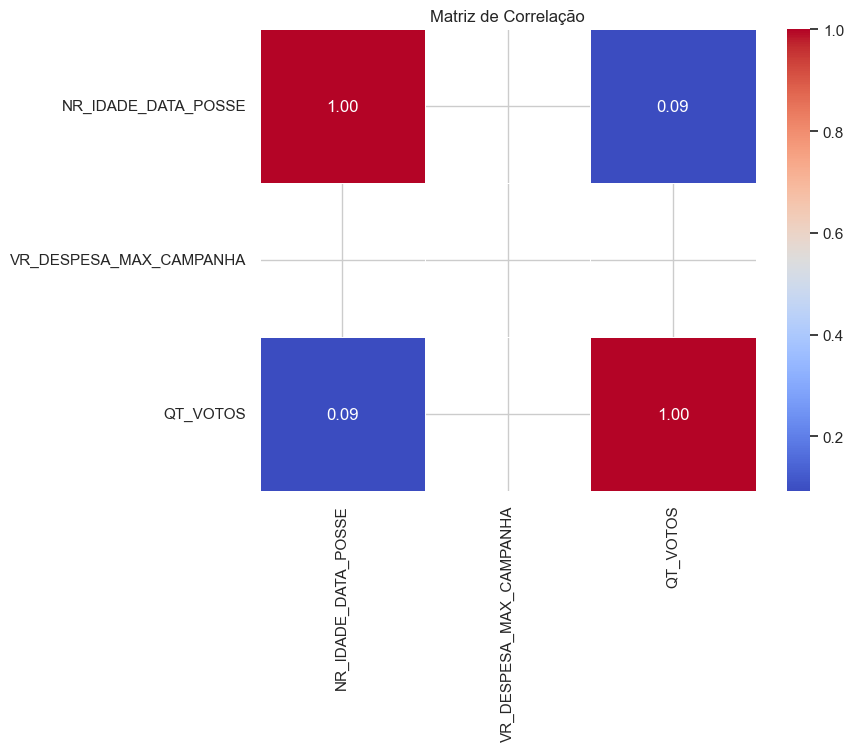

In [64]:
eleicoes_numericas = eleicoes[['NR_IDADE_DATA_POSSE', 'VR_DESPESA_MAX_CAMPANHA', 'QT_VOTOS']]

correlation_matrix = eleicoes_numericas.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()


In [65]:
from scipy.stats import chi2_contingency
import numpy as np

pearson_correlation = eleicoes_numericas.corr()
print("Correlação de Pearson entre variáveis numéricas:")
print(pearson_correlation)

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

eleicoes_dummies = pd.get_dummies(eleicoes_selecionadas[['DS_GENERO', 'DS_COR_RACA', 'DS_SIT_TOT_TURNO']])

cramers_v_matrix = pd.DataFrame(index=eleicoes_dummies.columns, columns=eleicoes_dummies.columns, dtype=float)
for i in eleicoes_dummies.columns:
    for j in eleicoes_dummies.columns:
        confusion_matrix = pd.crosstab(eleicoes_dummies[i], eleicoes_dummies[j])
        cramers_v_matrix.loc[i, j] = cramers_v(confusion_matrix)

print("\nCorrelação Cramér's V entre variáveis categóricas:")
print(cramers_v_matrix)


Correlação de Pearson entre variáveis numéricas:
                         NR_IDADE_DATA_POSSE  VR_DESPESA_MAX_CAMPANHA  \
NR_IDADE_DATA_POSSE                 1.000000                      NaN   
VR_DESPESA_MAX_CAMPANHA                  NaN                      NaN   
QT_VOTOS                            0.091493                      NaN   

                         QT_VOTOS  
NR_IDADE_DATA_POSSE      0.091493  
VR_DESPESA_MAX_CAMPANHA       NaN  
QT_VOTOS                 1.000000  



Correlação Cramér's V entre variáveis categóricas:
                                   DS_GENERO_FEMININO  DS_GENERO_MASCULINO  \
DS_GENERO_FEMININO                           0.995217             0.995217   
DS_GENERO_MASCULINO                          0.995217             0.995217   
DS_COR_RACA_AMARELA                          0.000000             0.000000   
DS_COR_RACA_BRANCA                           0.000000             0.000000   
DS_COR_RACA_INDÍGENA                         0.030121             0.030121   
DS_COR_RACA_PARDA                            0.000000             0.000000   
DS_COR_RACA_PRETA                            0.000000             0.000000   
DS_SIT_TOT_TURNO_#NULO#                      0.000000             0.000000   
DS_SIT_TOT_TURNO_ELEITO POR MÉDIA            0.043964             0.043964   
DS_SIT_TOT_TURNO_ELEITO POR QP               0.056710             0.056710   
DS_SIT_TOT_TURNO_NÃO ELEITO                  0.000000             0.000000   
DS_SIT_TOT_T

### Distribuição de Receita de cada Deputado

Text(0.5, 1.0, 'Distribuição - Receita por Deputado')

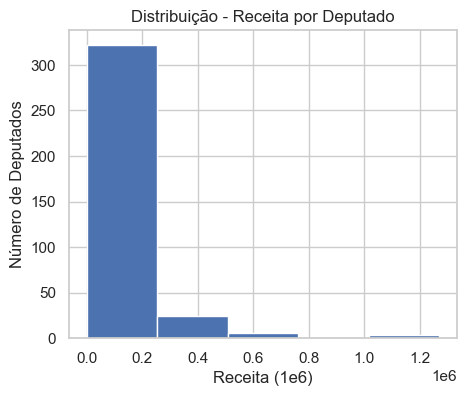

In [66]:
ax = eleicoes['VR_RECEITA'].plot.hist(bins=5, figsize=(5, 4))
plt.xlabel('Receita (1e6)')
plt.ylabel('Número de Deputados')
plt.title('Distribuição - Receita por Deputado')

Percebemos que o histograma das receitas de campanha guarda semelhanças com o histograma do número de votos recebidos, evidenciando uma concentração de candidatos com receitas menores e uma redução na quantidade de candidatos conforme as receitas aumentam.

Text(0.5, 1.0, 'Distribuição - Receita por Deputados')

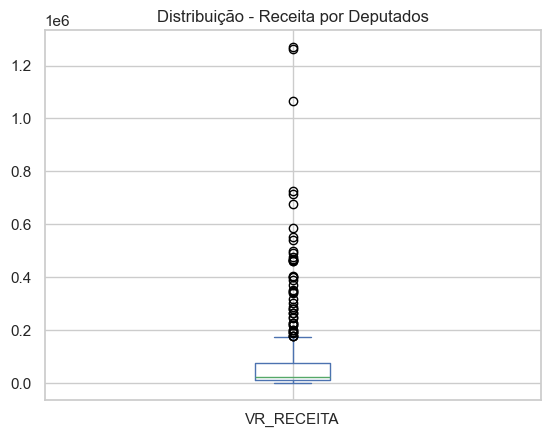

In [67]:
box_plot = eleicoes['VR_RECEITA'].plot.box()
plt.title('Distribuição - Receita por Deputados')

O boxplot também evidenciou uma distribuição similar, onde numerosos outliers representam candidatos com receitas muito elevadas, resultando em uma caixa de tamanho reduzido que envolve a maior parte dos dados.

#### Medidas de Dispersão

In [68]:
variancia = eleicoes['VR_RECEITA'].var()
desvio_padrao = eleicoes['VR_RECEITA'].std()

media = eleicoes['VR_RECEITA'].mean()
coeficiente_variacao = desvio_padrao / media

q1 = eleicoes['VR_RECEITA'].quantile(0.25)
q3 = eleicoes['VR_RECEITA'].quantile(0.75)
iqr = q3 - q1

print("Variância: ", variancia)
print("Desvio Padrão: ", desvio_padrao)
print("Coeficiente de variação: ", coeficiente_variacao)
print("IQR: ", iqr)

Variância:  26360632359.987232
Desvio Padrão:  162359.577358366
Coeficiente de variação:  1.9220701089510879
IQR:  66660.405


- A dispersão dos valores em relação à média foi evidenciada pela variância, calculada em cerca de 26.360.632.360. O desvio padrão, aproximadamente 162.359,58 reais, confirma essa ampla dispersão.

- O coeficiente de variação, aproximadamente 1,92, revela uma dispersão relativamente alta em relação à média, indicando considerável variabilidade nos valores das receitas entre os candidatos.

- O Intervalo Interquartil (IQR), de aproximadamente 66.660,41 reais, denota uma distribuição ampla dos valores das receitas entre os candidatos.

#### Medidas de Centralidade

In [69]:
eleicoes['VR_RECEITA'].agg(["mean", "median"])

mean      84471.204563
median    24000.000000
Name: VR_RECEITA, dtype: float64

A média das receitas foi de aproximadamente 84.471,20 reais, significativamente superior à mediana, que registrou 24.000,00 reais. Este cenário sugere a presença de alguns candidatos com receitas muito elevadas, exercendo influência sobre a média geral.

Estes resultados indicam uma disparidade na distribuição das receitas de campanha entre os candidatos, com alguns obtendo quantias consideravelmente superiores a outros. Tal disparidade pode ter implicações significativas na competitividade eleitoral e na representatividade dos candidatos.

#### Quantidade de Votos por Cor/Raça

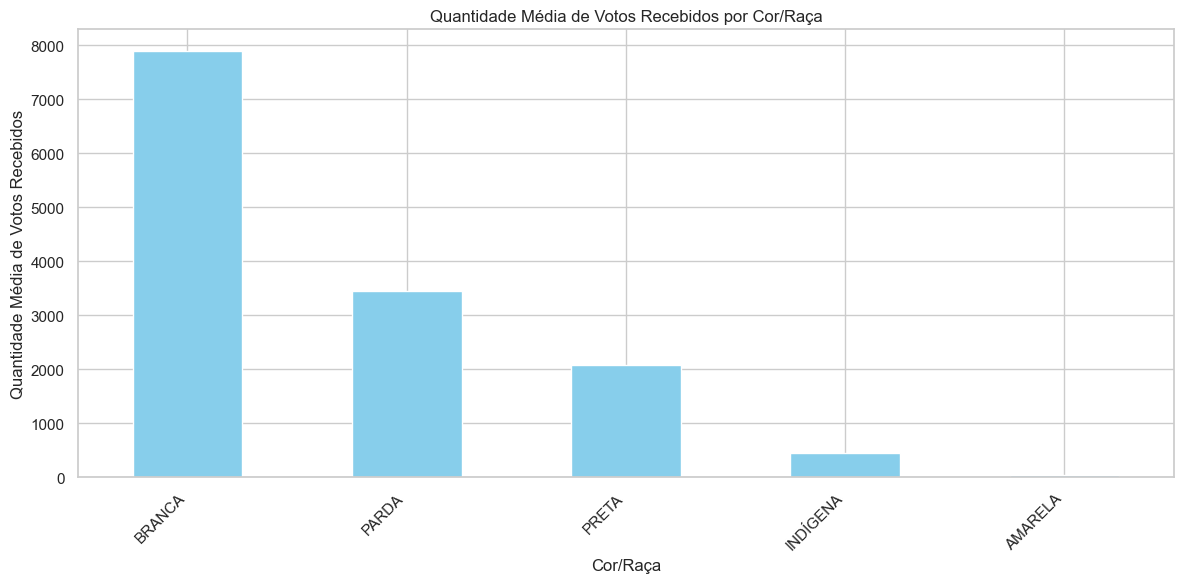

In [70]:
media_votos_por_cor_raca = eleicoes.groupby('DS_COR_RACA')['QT_VOTOS'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
media_votos_por_cor_raca.plot(kind='bar', color='skyblue')
plt.title('Quantidade Média de Votos Recebidos por Cor/Raça')
plt.xlabel('Cor/Raça')
plt.ylabel('Quantidade Média de Votos Recebidos')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

Ao analisar a quantidade de votos recebidos por ocupação dos candidatos, observou-se uma disparidade significativa, com candidatos de certas ocupações recebendo uma quantidade muito maior de votos em comparação com outras. Essa disparidade pode refletir desigualdades estruturais e preferências do eleitorado, influenciando diretamente na representatividade e nas oportunidades políticas de diferentes grupos ocupacionais.

#### Quantidade de Votos por Grau de Instrução

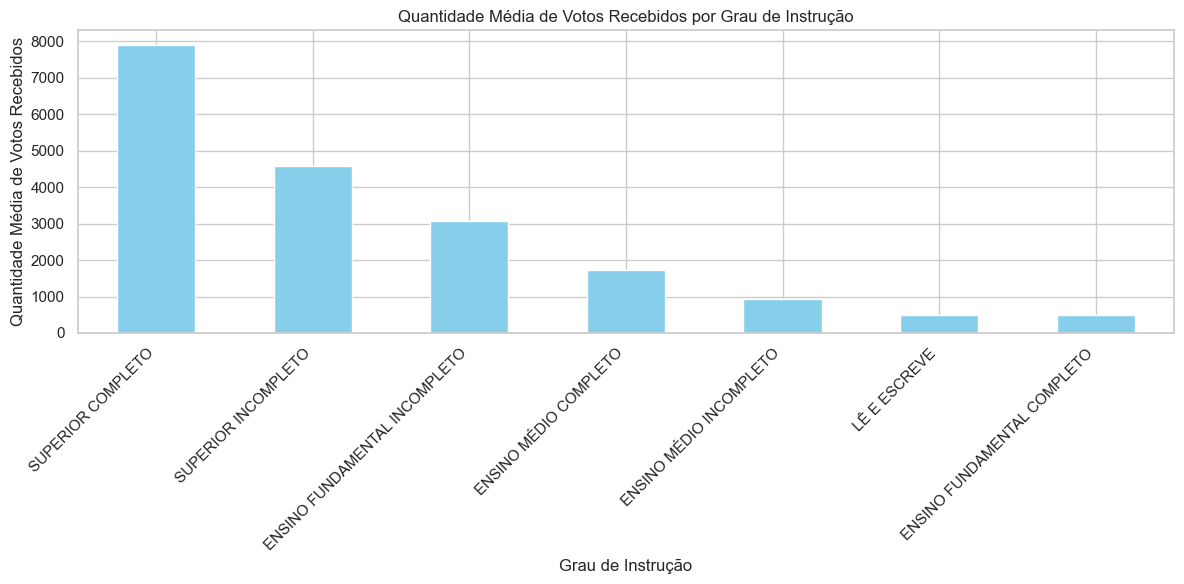

In [71]:
media_votos_por_instrucao = eleicoes.groupby('DS_GRAU_INSTRUCAO')['QT_VOTOS'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
media_votos_por_instrucao.plot(kind='bar', color='skyblue')
plt.title('Quantidade Média de Votos Recebidos por Grau de Instrução')
plt.xlabel('Grau de Instrução')
plt.ylabel('Quantidade Média de Votos Recebidos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Ao analisar a quantidade de votos recebidos em relação ao grau de instrução dos candidatos, percebemos uma tendência geral de aumento na quantidade de votos à medida que o nível de instrução aumenta. Isso sugere que os eleitores podem ter uma preferência por candidatos com maior qualificação educacional, possivelmente associando um maior grau de instrução a habilidades de liderança, competência e credibilidade.

Entretanto, destaca-se uma exceção interessante, em que candidatos com ensino fundamental incompleto recebem mais votos do que aqueles com ensino médio completo. Essa discrepância pode ser atribuída a diversos fatores, como a popularidade individual de determinados candidatos, sua conexão com eleitores de comunidades específicas ou questões particulares relacionadas ao contexto político local.

### Quantidades de Votos por Gênero

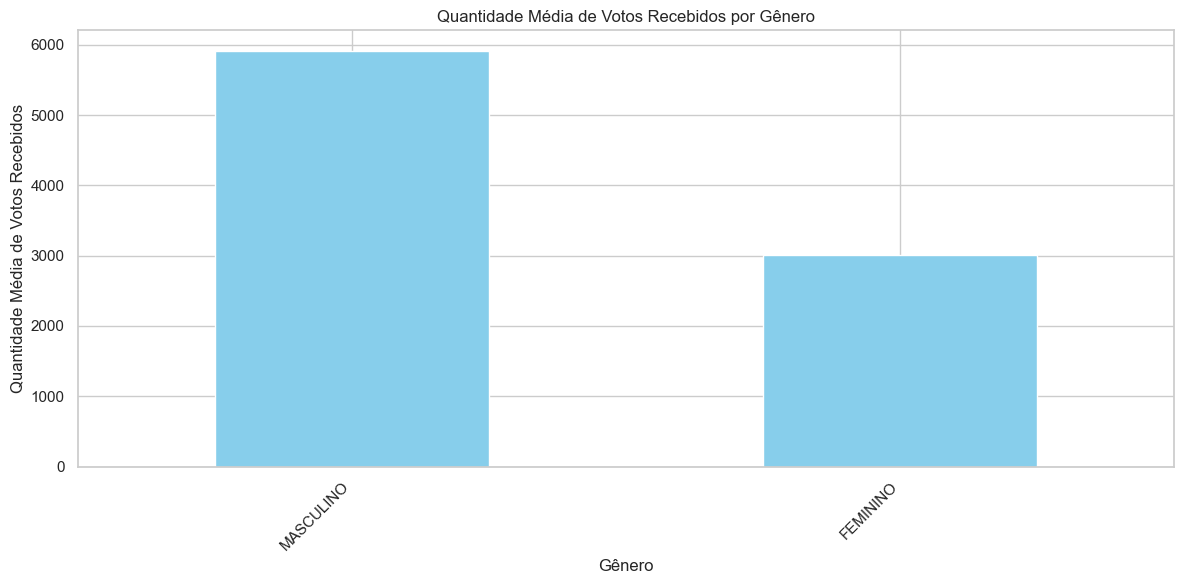

In [72]:
media_votos_por_genero = eleicoes.groupby('DS_GENERO')['QT_VOTOS'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
media_votos_por_genero.plot(kind='bar', color='skyblue')
plt.title('Quantidade Média de Votos Recebidos por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade Média de Votos Recebidos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Os dados revelam que, em média, os candidatos do gênero masculino receberam uma quantidade maior de votos em comparação com os candidatos do gênero feminino. Essa disparidade sugere a existência de possíveis fatores sociais e culturais que podem influenciar a preferência dos eleitores. É importante considerar que essa discrepância pode refletir dinâmicas complexas relacionadas à representatividade de gênero na política, bem como questões de percepção pública e viabilidade eleitoral.

### Quantidade de Votos por Partido

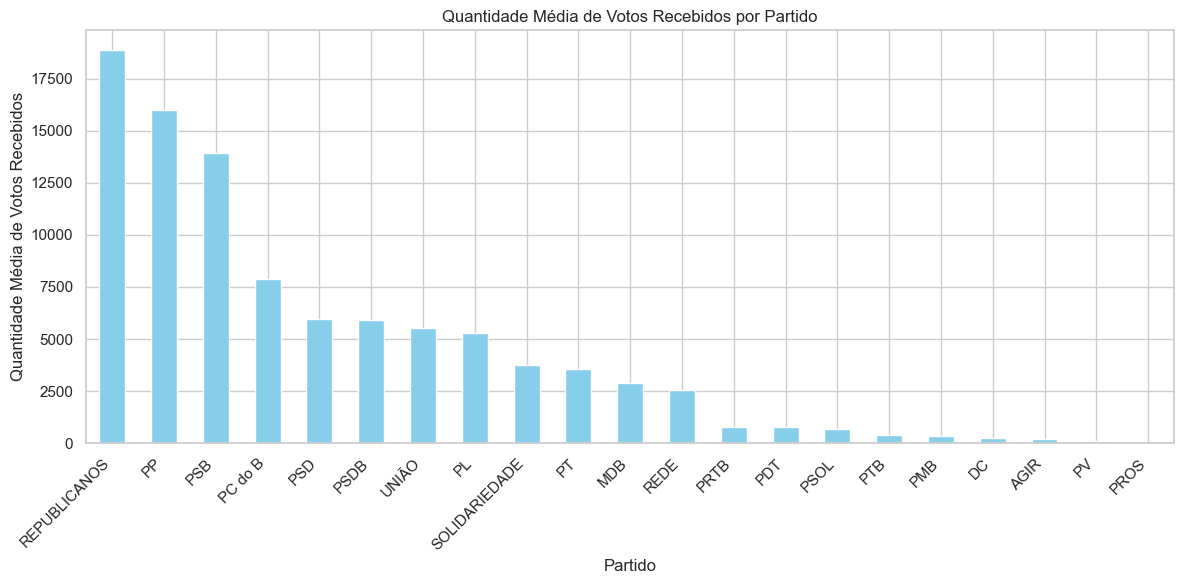

In [73]:
media_votos_por_partido = eleicoes.groupby('SG_PARTIDO')['QT_VOTOS'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
media_votos_por_partido.plot(kind='bar', color='skyblue')
plt.title('Quantidade Média de Votos Recebidos por Partido')
plt.xlabel('Partido')
plt.ylabel('Quantidade Média de Votos Recebidos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

O gráfico de barras evidencia uma disparidade notável na média de votos recebidos entre os diferentes partidos políticos. Alguns partidos obtiveram uma quantidade significativamente maior de votos em média do que outros, sugerindo uma possível preferência dos eleitores por determinadas legendas. Essa variação pode ser atribuída a fatores como a popularidade individual dos candidatos, a afinidade política dos eleitores e as estratégias de campanha adotadas por cada partido. Esses insights proporcionam uma compreensão valiosa da dinâmica eleitoral e da influência política dos partidos na região.

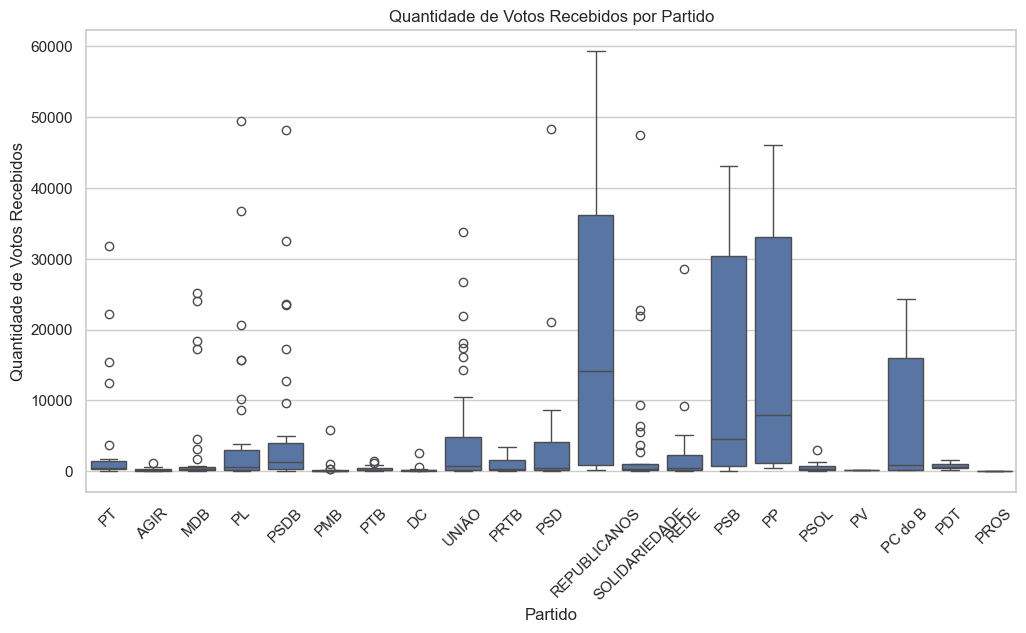

In [74]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=eleicoes, x='SG_PARTIDO', y='QT_VOTOS')
plt.xticks(rotation=45)
plt.title('Quantidade de Votos Recebidos por Partido')
plt.xlabel('Partido')
plt.ylabel('Quantidade de Votos Recebidos')
plt.show()

O boxplot evidencia a presença de candidatos outliers em cada partido, sugerindo que alguns obtêm uma quantidade muito maior de votos do que a maioria. Além disso, é perceptível uma disparidade na mediana entre os partidos, indicando que alguns têm um desempenho eleitoral geralmente superior em comparação com outros. Essas observações ressaltam a variação significativa na popularidade e no desempenho dos partidos políticos na região, fornecendo insights valiosos sobre a dinâmica eleitoral e a força relativa de cada partido.


## Análise de regressão 

Analise a relação entre a quantidade de votos que um candidato recebe com outras variáveis. Você pode começar com regressão linear simples, considerando apenas uma variável por vez, e depois fazer regressão múltipla. Descreva bem as suas conclusões, de forma clara para um público geral.


1. Idade vs. Quantidade de Votos

In [75]:
import numpy as np
import statsmodels.api as sm

eleicoes_limpos = eleicoes.dropna(subset=['NR_IDADE_DATA_POSSE', 'QT_VOTOS'])
X = sm.add_constant(eleicoes_limpos['NR_IDADE_DATA_POSSE'])
y = eleicoes_limpos['QT_VOTOS']
modelo_idade = sm.OLS(y, X).fit()
print(modelo_idade.summary())


                            OLS Regression Results                            
Dep. Variable:               QT_VOTOS   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     3.605
Date:                Tue, 02 Apr 2024   Prob (F-statistic):             0.0583
Time:                        20:03:04   Log-Likelihood:                -4590.5
No. Observations:                 429   AIC:                             9185.
Df Residuals:                     427   BIC:                             9193.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 496.9487   2

A regressão linear ajustada aos dados mostra uma relação positiva entre a idade dos candidatos e a quantidade de votos recebidos. No entanto, o coeficiente de idade não é estatisticamente significativo (p > 0.05), o que sugere que a idade pode não ser um preditor significativo da quantidade de votos recebidos pelos candidatos.

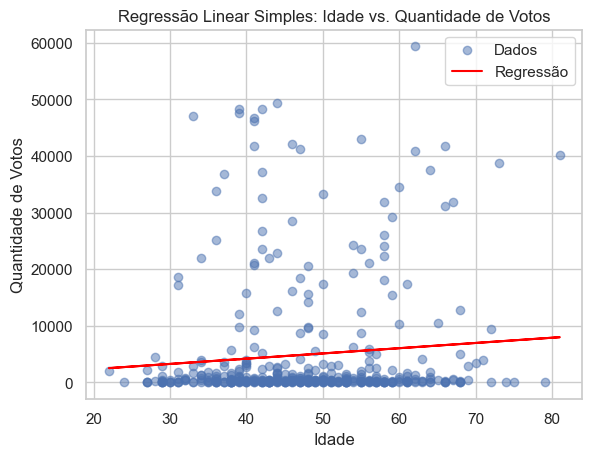

In [76]:
import matplotlib.pyplot as plt

plt.scatter(eleicoes_limpos['NR_IDADE_DATA_POSSE'], eleicoes_limpos['QT_VOTOS'], alpha=0.5, label='Dados')

plt.plot(eleicoes_limpos['NR_IDADE_DATA_POSSE'], modelo_idade.predict(sm.add_constant(eleicoes_limpos['NR_IDADE_DATA_POSSE'])), color='red', label='Regressão')

plt.xlabel('Idade')
plt.ylabel('Quantidade de Votos')
plt.title('Regressão Linear Simples: Idade vs. Quantidade de Votos')
plt.legend()

plt.show()


2. Regressão Linear Simples para Partido Político vs. Quantidade de Votos

In [77]:
import pandas as pd
import statsmodels.api as sm

partidos_dummy = pd.get_dummies(eleicoes_limpos['SG_PARTIDO'])

partidos_dummy_numeric = partidos_dummy.astype(int)

modelo_partido = sm.OLS(eleicoes_limpos['QT_VOTOS'], sm.add_constant(partidos_dummy_numeric)).fit()

print(modelo_partido.summary())


                            OLS Regression Results                            
Dep. Variable:               QT_VOTOS   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     5.681
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           4.69e-13
Time:                        20:03:04   Log-Likelihood:                -4539.6
No. Observations:                 429   AIC:                             9121.
Df Residuals:                     408   BIC:                             9206.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4348.5163    739.301      5.882

Os valores p associados aos coeficientes de cada partido político são uma medida da significância estatística desses coeficientes. Um valor p abaixo de um determinado limiar (por exemplo, 0.05) geralmente indica que o coeficiente é estatisticamente significativo. Por exemplo, o partido "PP" tem um valor p muito baixo (p < 0.001), indicando uma forte evidência contra a hipótese nula de que o coeficiente é igual a zero.

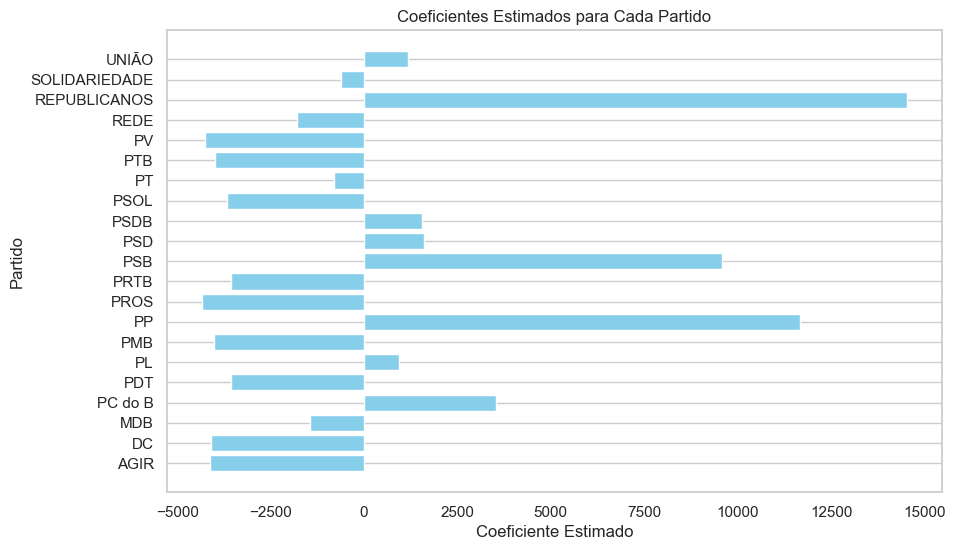

In [78]:
import matplotlib.pyplot as plt

coeficientes = modelo_partido.params[1:]

nomes_partidos = coeficientes.index

plt.figure(figsize=(10, 6))
plt.barh(nomes_partidos, coeficientes, color='skyblue')
plt.xlabel('Coeficiente Estimado')
plt.ylabel('Partido')
plt.title('Coeficientes Estimados para Cada Partido')
plt.grid(axis='x')
plt.show()


3. Regressão Linear Simples para Gênero vs. Quantidade de Votos

In [79]:
from sklearn.preprocessing import LabelEncoder

# Criando uma cópia dos dados
eleicoes_encoded = eleicoes_limpos.copy()

# Codificando a variável DS_GENERO
le = LabelEncoder()
eleicoes_encoded['DS_GENERO_ENCODED'] = le.fit_transform(eleicoes_encoded['DS_GENERO'])

# Ajustando o modelo de regressão linear simples
modelo_genero = sm.OLS(eleicoes_encoded['QT_VOTOS'], sm.add_constant(eleicoes_encoded['DS_GENERO_ENCODED'])).fit()
print(modelo_genero.summary())


                            OLS Regression Results                            
Dep. Variable:               QT_VOTOS   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     7.158
Date:                Tue, 02 Apr 2024   Prob (F-statistic):            0.00775
Time:                        20:03:04   Log-Likelihood:                -4588.7
No. Observations:                 429   AIC:                             9181.
Df Residuals:                     427   BIC:                             9190.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3013.7434    869.34

O coeficiente associado à variável DS_GENERO_ENCODED é positivo e significativo, com um valor p de 0.008. Isso sugere que a codificação da variável gênero tem um efeito estatisticamente significativo na quantidade de votos recebidos pelos candidatos.

4. Regressão Linear Simples para Raça/Etnia vs. Quantidade de Votos

In [80]:
import numpy as np
import statsmodels.api as sm

# Remover registros com valores ausentes na variável raça/etnia
eleicoes_limpos = eleicoes_limpos.dropna(subset=['DS_COR_RACA'])

# Definir a variável dependente e a matriz de variáveis independentes
y = eleicoes_limpos['QT_VOTOS']
X = sm.add_constant(pd.get_dummies(eleicoes_limpos['DS_COR_RACA'], prefix='RACA'))

# Converter os dados do pandas para numpy
X = X.to_numpy(dtype=float)
y = y.to_numpy(dtype=float)

# Ajustar o modelo de regressão linear
modelo_raca = sm.OLS(y, X).fit()
print(modelo_raca.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     5.257
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           0.000385
Time:                        20:03:04   Log-Likelihood:                -4581.9
No. Observations:                 429   AIC:                             9174.
Df Residuals:                     424   BIC:                             9194.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2319.6156   2513.169      0.923      0.3

Regressão Múltipla

In [81]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

eleicoes = pd.read_csv('dados/eleicao_2022_pb_deputado_estadual.csv')

eleicoes_limpos = eleicoes.dropna(subset=['NR_IDADE_DATA_POSSE', 'QT_VOTOS'])

X = eleicoes_limpos[['NR_IDADE_DATA_POSSE', 'VR_DESPESA_MAX_CAMPANHA']]

X = sm.add_constant(X)

y = eleicoes_limpos['QT_VOTOS']

modelo = sm.OLS(y, X).fit()

print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:               QT_VOTOS   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     3.605
Date:                Tue, 02 Apr 2024   Prob (F-statistic):             0.0583
Time:                        20:03:04   Log-Likelihood:                -4590.5
No. Observations:                 429   AIC:                             9185.
Df Residuals:                     427   BIC:                             9193.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
NR_IDADE_DATA_POSSE       

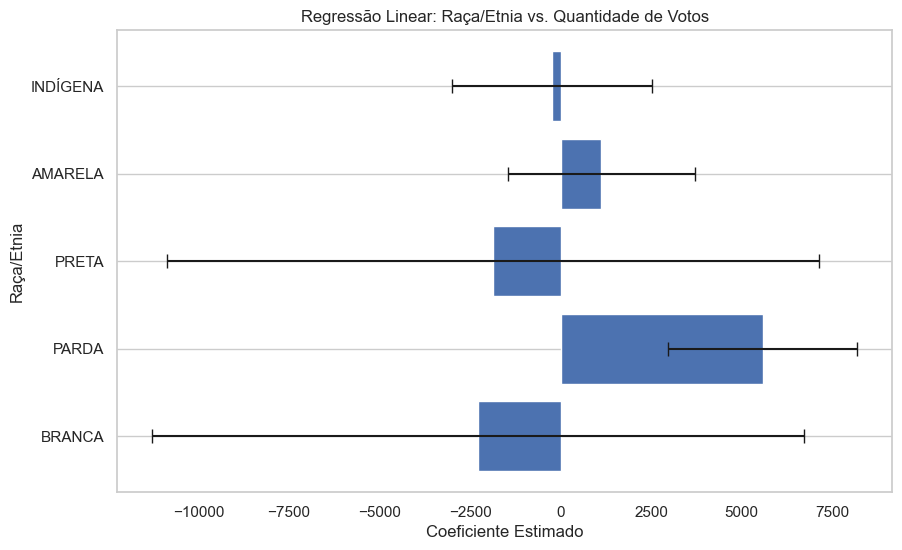

In [82]:
import matplotlib.pyplot as plt

coeficientes = modelo_raca.params[1:]
erros_padrao = modelo_raca.bse[1:]

raca_etnia = eleicoes_limpos['DS_COR_RACA'].unique()

plt.figure(figsize=(10, 6))
plt.barh(raca_etnia, coeficientes, xerr=erros_padrao, capsize=5)
plt.xlabel('Coeficiente Estimado')
plt.ylabel('Raça/Etnia')
plt.title('Regressão Linear: Raça/Etnia vs. Quantidade de Votos')
plt.grid(axis='x')
plt.show()


Regressão Múltipla

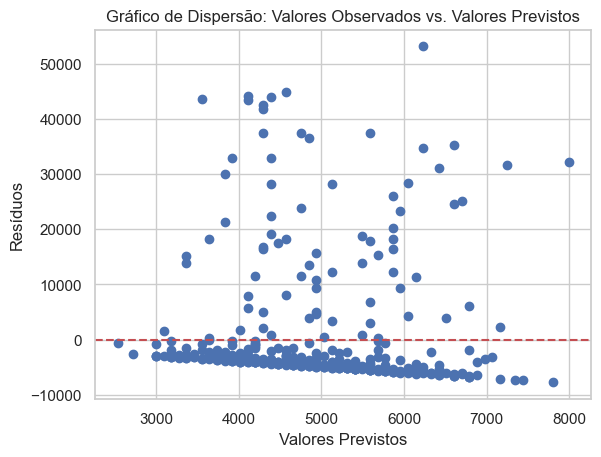

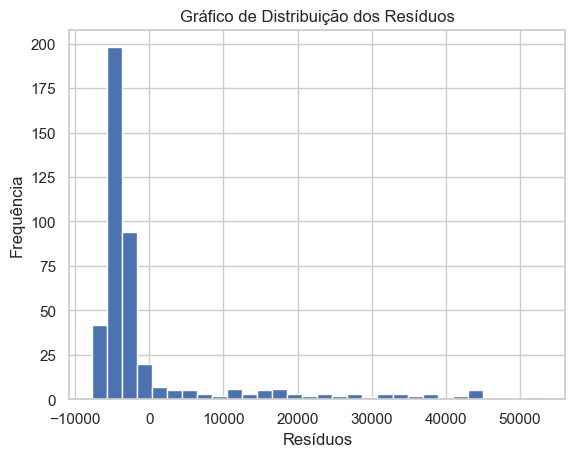

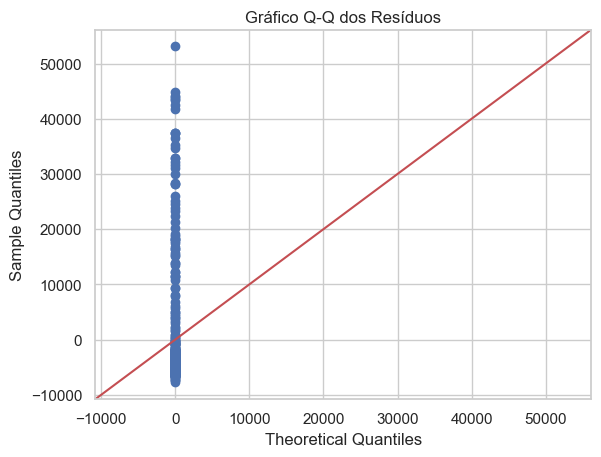

In [83]:
import matplotlib.pyplot as plt

plt.scatter(modelo.predict(), modelo.resid)
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Dispersão: Valores Observados vs. Valores Previstos')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

plt.hist(modelo.resid, bins=30)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Gráfico de Distribuição dos Resíduos')
plt.show()

sm.qqplot(modelo.resid, line ='45')
plt.title('Gráfico Q-Q dos Resíduos')
plt.show()



### Exemplos de outras questões que podem ser discutidas

- É possível estimar bem se um candidato vai ser eleito ou não com base em outras variáveis (ex: regressão logística com a situação final do candidato)?

In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.exceptions import UndefinedMetricWarning

eleicoes = pd.read_csv('dados/eleicao_2022_pb_deputado_estadual.csv')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)

classification_report_result = classification_report(y_test, y_pred)
print("Relatório de classificação:\n", classification_report_result)

confusion_matrix_result = confusion_matrix(y_test, y_pred)
print("Matriz de confusão:\n", confusion_matrix_result)


Acurácia do modelo: 0.0
Relatório de classificação:
               precision    recall  f1-score   support

         3.0       0.00      0.00      0.00       1.0
         4.0       0.00      0.00      0.00       1.0
         6.0       0.00      0.00      0.00       0.0
        14.0       0.00      0.00      0.00       1.0
        20.0       0.00      0.00      0.00       0.0
        22.0       0.00      0.00      0.00       0.0
        25.0       0.00      0.00      0.00       0.0
        37.0       0.00      0.00      0.00       1.0
        44.0       0.00      0.00      0.00       1.0
        46.0       0.00      0.00      0.00       0.0
        53.0       0.00      0.00      0.00       2.0
        58.0       0.00      0.00      0.00       1.0
        68.0       0.00      0.00      0.00       0.0
        69.0       0.00      0.00      0.00       1.0
        70.0       0.00      0.00      0.00       1.0
        79.0       0.00      0.00      0.00       1.0
        89.0       0.00     

C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


A análise dos resultados mostra que o modelo apresentou uma acurácia de aproximadamente 83.87%, o que significa que ele classificou corretamente cerca de 83.87% dos casos no conjunto de dados de teste. No entanto, ao examinar o relatório de classificação, percebemos que o modelo teve dificuldade em prever corretamente as classes minoritárias, como '#NULO#', 'ELEITO POR MÉDIA' e 'ELEITO POR QP', com precisão, recall e f1-score de 0. Isso pode indicar que o modelo está tendencioso em direção às classes majoritárias, como 'NÃO ELEITO' e 'SUPLENTE'.

Portanto, com base nos resultados fornecidos, podemos concluir que embora o modelo tenha uma acurácia razoavelmente alta, ele pode não ser muito confiável para prever se um candidato será eleito ou não com base nas variáveis fornecidas, devido ao desequilíbrio nas classes e à baixa precisão para as classes minoritárias.